In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [16]:
minimo = df['value'].min()
maximo = df['value'].max()

# O sea, hay que dejar todos los datos que estén sobre el 2.5% del mínimo, y bajo el 2.5% del maximo
valor_minimo = minimo + (minimo * 0.025)
valor_maximo = maximo - (maximo * 0.025)

mask_minimo = df['value'] > (valor_minimo)
mask_maximo = df['value'] < (valor_maximo)

mask_total = (mask_minimo) & (mask_maximo)

df = df[mask_total]
df

,value
date,
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


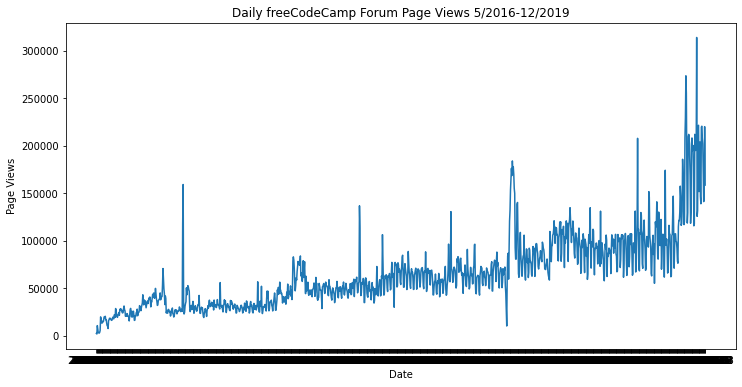

In [17]:
fig, axis = plt.subplots(figsize = (12, 6))

axis.set_xlabel('Date')
axis.set_ylabel('Page Views')
axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axis.plot(df)



In [44]:
diccionario_total = {}

mes_previo = None
dias_en_el_mes = 0

for fecha in df.index:
    
    parse = fecha.split('-')
    año = parse[0]
    mes = parse[1]
    dia = parse[2]

    if año not in diccionario_total.keys():
        diccionario_total[año] = {f'{mes}': df.loc[fecha]}
        dias_en_el_mes = 1

    if mes != mes_previo:
        # Si se cumple esto, significa que acabamos de pasar al otro mes
        # En ese caso, ya se terminó de sumar todo, por lo tanto, es momento de sacar el promedio
        if mes_previo:
            # Si existía un mes anterior, entonces hay que sacar el promedio. Si no, es porque 
            # recien estamos empezando en el algoritmo.
            promedio = diccionario_total[año][mes_previo] / dias_en_el_mes
            diccionario_total[año][mes_previo] = promedio

        # Además, se debe agregar la nueva entrada al diccionario
        diccionario_total[año] = {f'{mes}': df.loc[fecha]}
        dias_en_el_mes = 1

    else:
        diccionario_total[año][mes] += df.loc[fecha]
        dias_en_el_mes += 1

diccionario_total

{'2016': {'12': value    20197
  Name: 2016-12-31, dtype: int64},
 '2017': {'12': value    42616
  Name: 2017-12-31, dtype: int64},
 '2018': {'12': value    60481
  Name: 2018-12-31, dtype: int64},
 '2019': {'10': value    189965
  Name: 2019-10-31, dtype: int64}}

In [42]:
df.loc['2016-06-11']

value    16098
Name: 2016-06-11, dtype: int64